 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns

whale_returns = Path("C:/Users/nawue/onedrive/Desktop/UofM-VIRT-FIN-PT-11-2023-U-LOLC/02-Homework/04-Pandas/Instructions/Starter_Code/Resources/whale_returns.csv")

whale_df = pd.read_csv(whale_returns)

# Convert Date column to date-time-index

whale_df['Date'] = pd.to_datetime(whale_df['Date'])

# Index 

whale_df.set_index("Date", inplace=True)

# Verify
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls

print("Nulls before cleaning:")

print(whale_df.isnull().sum())

Nulls before cleaning:
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64


In [4]:
# Drop nulls

whale_df.dropna(inplace=True)

# Verify drop

print("nNulls before cleaning:")
print(whale_df.isnull().sum())

nNulls before cleaning:
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns

algo_returns = Path("C:/Users/nawue/onedrive/Desktop/UofM-VIRT-FIN-PT-11-2023-U-LOLC/02-Homework/04-Pandas/Instructions/Starter_Code/Resources/algo_returns.csv")

algo_df = pd.read_csv(algo_returns)

# Convert Date to date-time-index

algo_df['Date'] = pd.to_datetime(algo_df['Date'])

# Fixing Indices

algo_df = algo_df.set_index("Date")

# Verify

algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls

print("Nulls before cleaning:")
print(algo_df.isnull().sum())

Nulls before cleaning:
Algo 1    0
Algo 2    6
dtype: int64


In [7]:
# Drop nulls

algo_df.dropna(inplace=True)

# Verify drop

print(whale_df.isnull().sum())

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices

sp500_returns = Path("C:/Users/nawue/onedrive/Desktop/UofM-VIRT-FIN-PT-11-2023-U-LOLC/02-Homework/04-Pandas/Instructions/Starter_Code/Resources/sp500_history.csv")

sp500_df = pd.read_csv(sp500_returns,
                      index_col="Date",
                      infer_datetime_format=True,
                      parse_dates=True)

# Convert Data Column to date-time-index
sp500_df=sp500_df.sort_index()

# Verify 

sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types

sp500_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types

sp500_df['Close'] = sp500_df['Close'].replace('[\$,]','', regex=True).astype(float)

# Verify fix

sp500_df.head()

sp500_df.dtypes

Close    float64
dtype: object

In [11]:
# Calculate Daily Returns

sp500_df = sp500_df.pct_change(1)

sp500_df.head()


,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [12]:
# Drop nulls

sp500_df.dropna(inplace=True)

sp500_df.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [13]:
# Rename `Close` Column to be specific to this portfolio.

#sp500_df.rename(columns={'Close': 'Closing Price'}, inplace=True)
columns = ['sp500']
sp500_df.columns = columns
sp500_df.head()

,sp500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.

CombinedReturns_df = pd.concat([whale_df, algo_df, sp500_df], axis="columns", join="inner")

CombinedReturns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: title={'center': 'Daily Returns Of All Portfolios'}, xlabel='Date'>

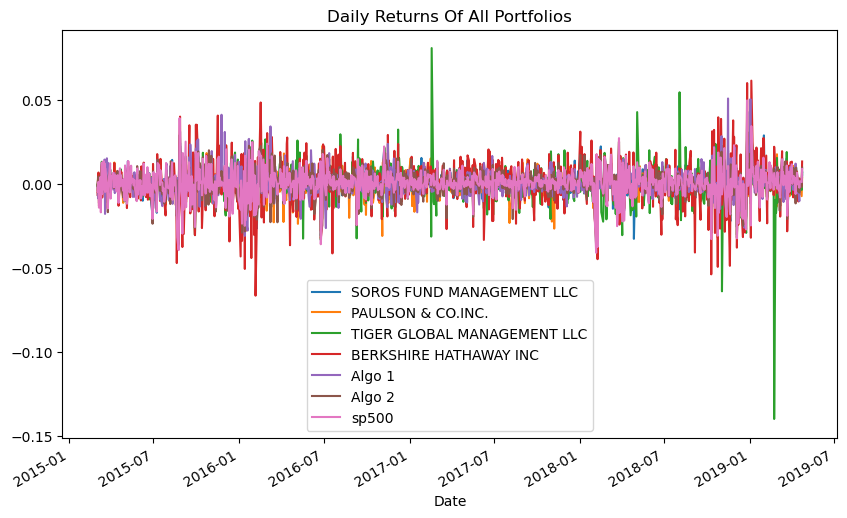

In [15]:
# Plot daily returns of all portfolios

CombinedReturns_df.plot(figsize=(10, 6), title="Daily Returns Of All Portfolios")

#### Calculate and Plot cumulative returns.

<Axes: title={'center': 'Cumulative Returns Of All Portfolios'}, xlabel='Date'>

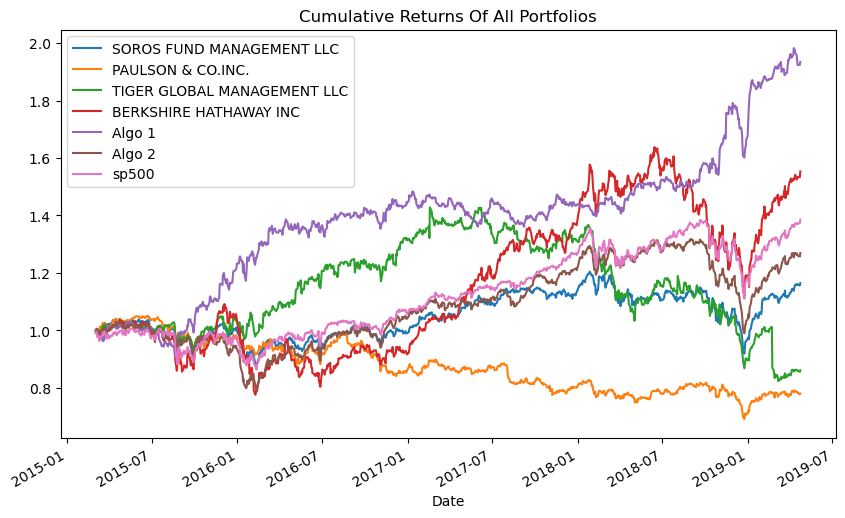

In [16]:
# Calculate cumulative returns of all portfolios

cumulative_returns = (1+CombinedReturns_df).cumprod()

# Plot cumulative returns

cumulative_returns.plot(figsize=(10, 6), title= "Cumulative Returns Of All Portfolios")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio

In [17]:
CombinedReturns_df.columns

Index(['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1',
       'Algo 2', 'sp500'],
      dtype='object')

<Axes: >

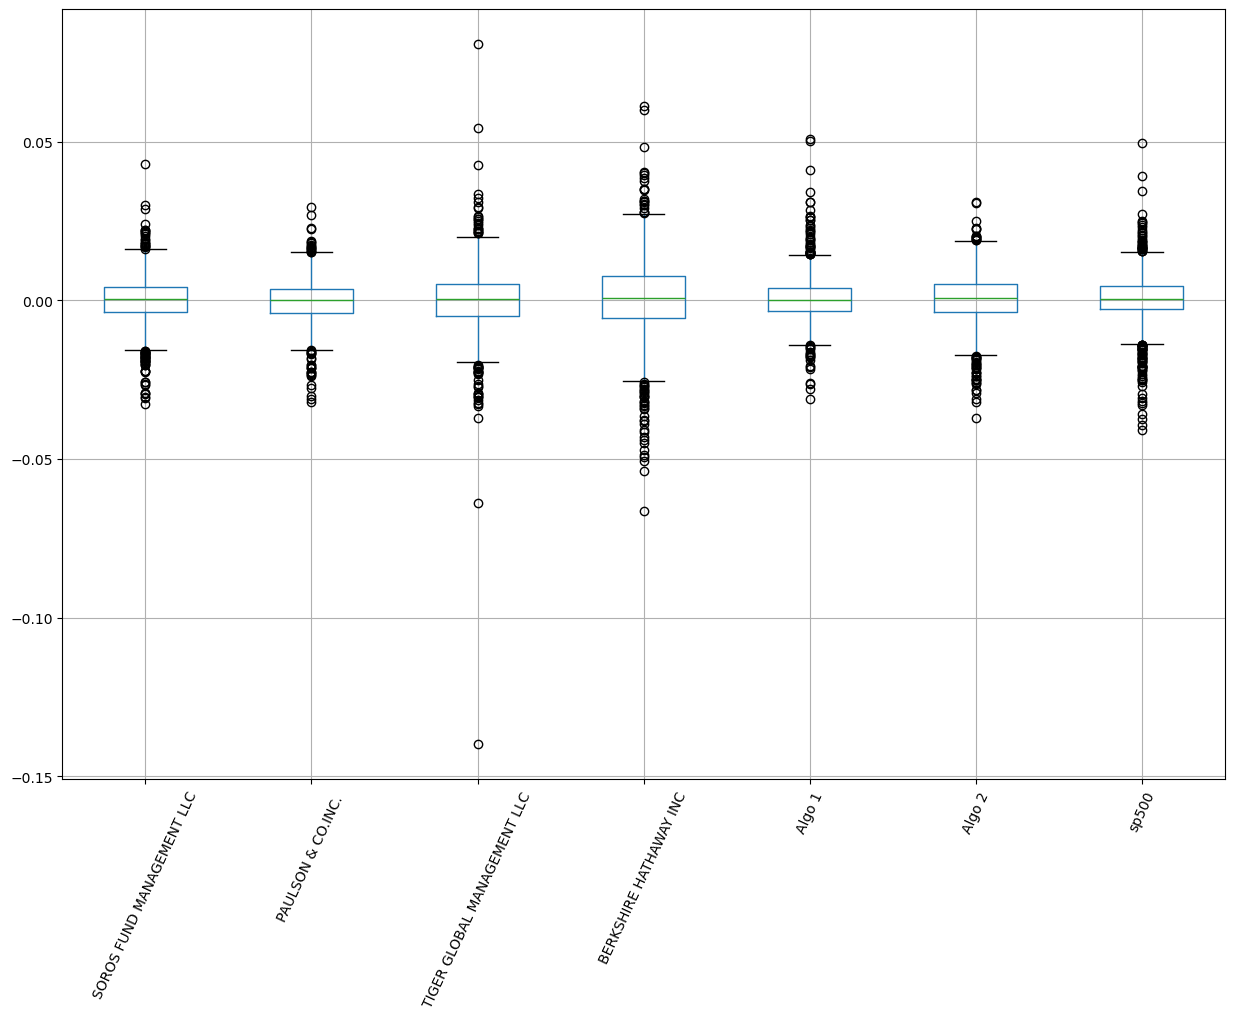

In [18]:
# Box plot to visually show risk

CombinedReturns_df.boxplot(column=['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1', 'Algo 2', 'sp500'], figsize=(15,10), rot=65 )

### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios

all_daily_std = CombinedReturns_df.std()
all_daily_std.sort_values()

PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
sp500                          0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [20]:
# Calculate  the daily standard deviation of S&P 500

sp500_daily_std = sp500_df.std()

# Determine which portfolios are riskier than the S&P 500

Risk = CombinedReturns_df.std() * np.sqrt(252)
Risk.sort_values()


PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
sp500                          0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)

annualized_std = CombinedReturns_df.std() * np.sqrt(252)

annualized_std.sort_values()

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
sp500                          0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: title={'center': 'Rolling Standard Deviation over 21 day period.'}, xlabel='Date'>

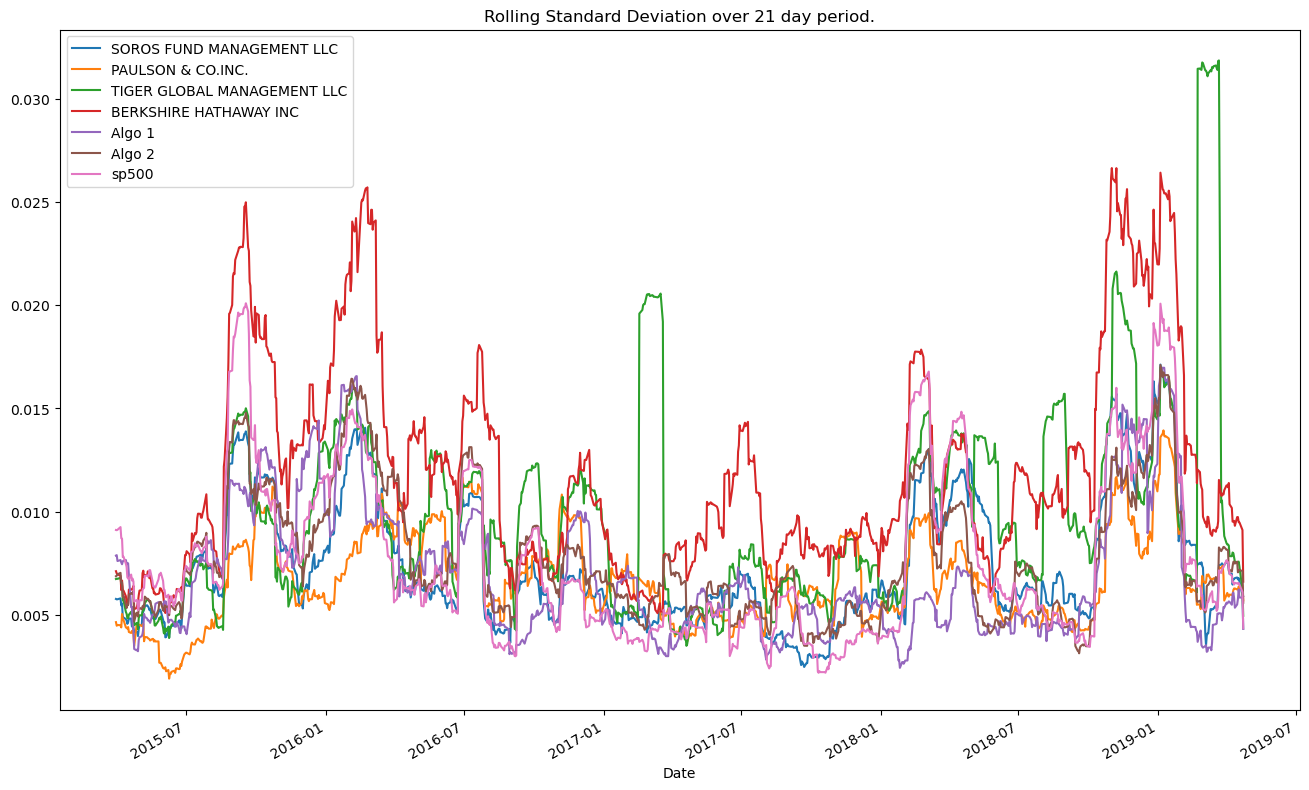

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

roll21_std = CombinedReturns_df.rolling(window=21).std()

# Plot the rolling standard deviation

roll21_std.plot(title="Rolling Standard Deviation over 21 day period.", figsize= (16,10))

### Calculate and plot the correlation

<Axes: >

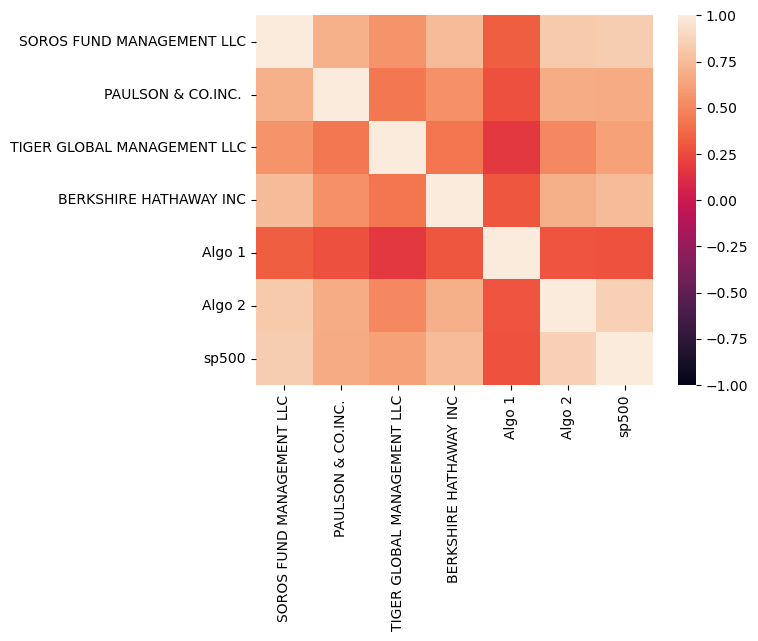

In [23]:
# Calculate the correlation

Correlation = CombinedReturns_df.corr()
Correlation

# Display the correlation matrix

sns.heatmap(Correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

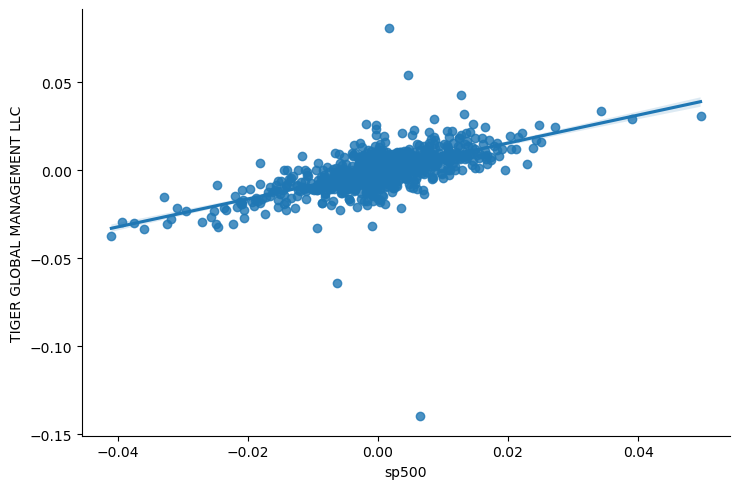

In [24]:
# Calculate covariance of a single portfolio

TigerGlobal_cov = CombinedReturns_df['TIGER GLOBAL MANAGEMENT LLC'].cov(CombinedReturns_df['sp500'])
                                                                
# Calculate variance of S&P 500

sp500_var = CombinedReturns_df['sp500'].var()                                                                    

# Computing beta

TigerGlobal_beta = TigerGlobal_cov / sp500_var

# Plot beta trend

sns.lmplot(x='sp500', y='TIGER GLOBAL MANAGEMENT LLC', data=CombinedReturns_df, aspect=1.5, fit_reg=True)

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<Axes: title={'center': 'Rolling Exponentially Weighted Average'}, xlabel='Date'>

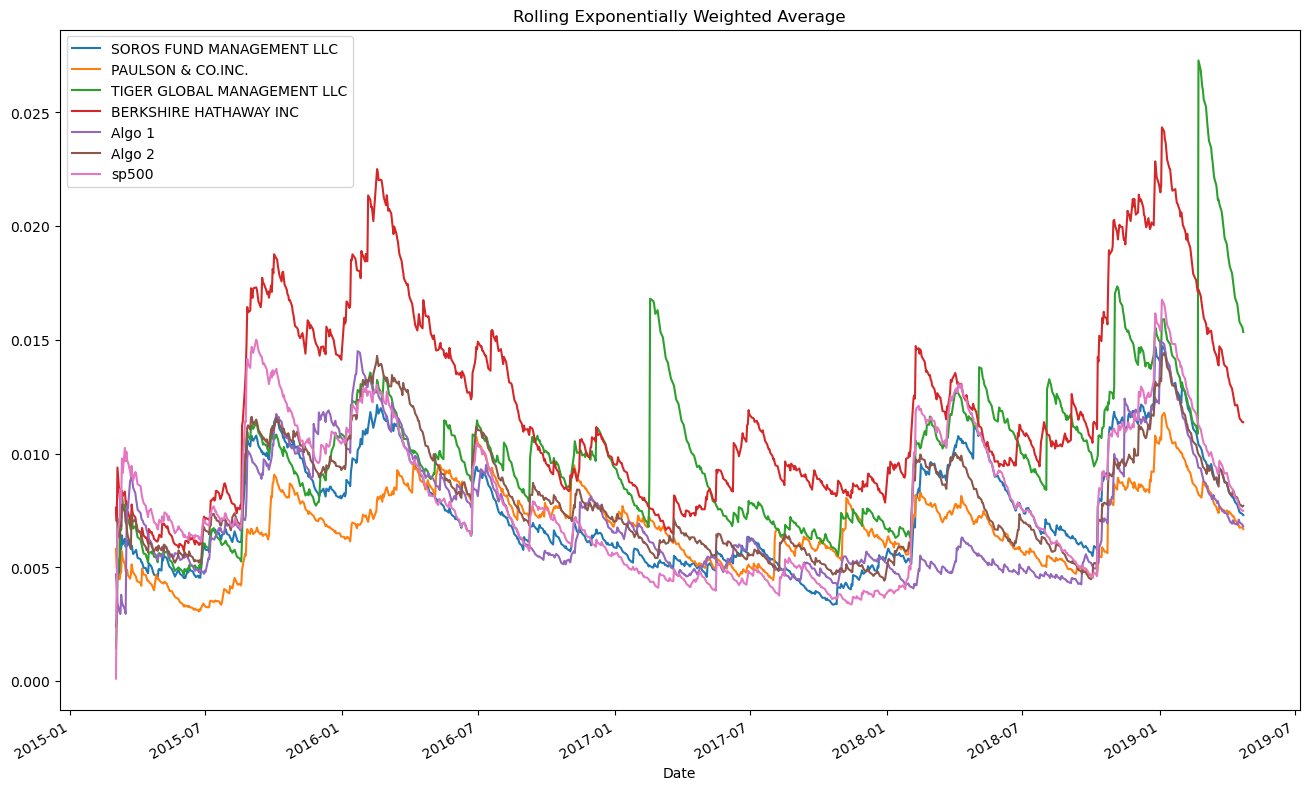

In [25]:
# Use `ewm` to calculate the rolling window

rolling_ewm = CombinedReturns_df.ewm(halflife=21).std()
rolling_ewm.plot(figsize=(16,10),  title=("Rolling Exponentially Weighted Average"))


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [26]:
# Annualized Sharpe Ratios

Sharpe_Ratios = (CombinedReturns_df.mean() * 252) / (all_daily_std * np.sqrt(252))

<Axes: title={'center': 'Annualized Sharpe Ratios'}>

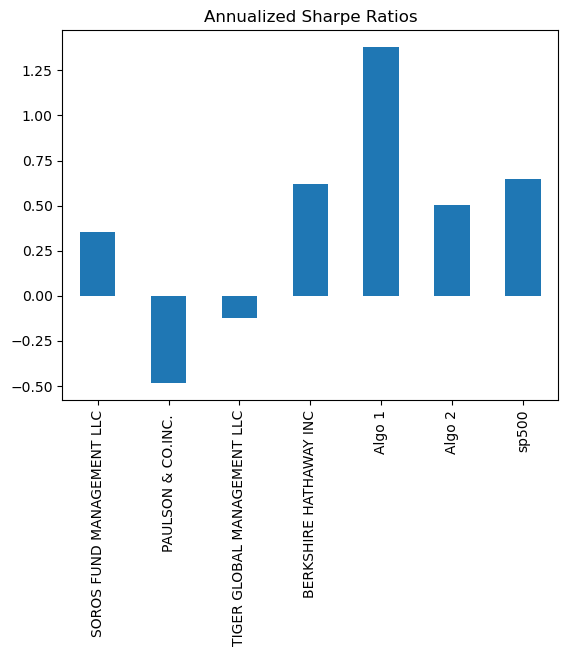

In [27]:
# Visualize the sharpe ratios as a bar plot

Sharpe_Ratios.plot(kind="bar", title="Annualized Sharpe Ratios")


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [28]:
# Reading data from 1st stock

AAPL_path = Path("Resources/aapl_historical.csv")

df_AAPL = pd.read_csv(AAPL_path, index_col='Trade DATE', parse_dates=True)

df_AAPL.drop(columns = ['Symbol'], inplace=True)

df_AAPL.head()


,NOCP
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75


In [29]:
# Reading data from 2nd stock

GOOG_path = Path("Resources/goog_historical.csv")

df_GOOG = pd.read_csv(GOOG_path, index_col='Trade DATE', parse_dates=True)

df_GOOG.drop(columns = ['Symbol'], inplace=True)

df_GOOG.head()


,NOCP
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40


In [30]:
# Reading data from 3rd stock

COST_path = Path("Resources/cost_historical.csv")

df_COST = pd.read_csv(COST_path, index_col='Trade DATE', parse_dates=True)

df_COST.drop(columns = ['Symbol'], inplace=True)

df_COST.head()

,NOCP
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62


In [31]:
# Combine all stocks in a single DataFrame

custom_port = pd.concat([df_GOOG, df_AAPL, df_COST], axis="columns", join="inner")

custom_port.head()


,NOCP,NOCP,NOCP
Trade DATE,,,
2019-05-09,1162.38,200.72,243.47
2019-05-08,1166.27,202.90,241.34
2019-05-07,1174.10,202.86,240.18
2019-05-06,1189.39,208.48,244.23
2019-05-03,1185.40,211.75,244.62


In [32]:
# Reset Date index

custom_port.reset_index("Trade DATE")

custom_port.sort_index()

custom_port

,NOCP,NOCP,NOCP
Trade DATE,,,
2019-05-09,1162.38,200.72,243.47
2019-05-08,1166.27,202.90,241.34
2019-05-07,1174.10,202.86,240.18
2019-05-06,1189.39,208.48,244.23
2019-05-03,1185.40,211.75,244.62
...,...,...,...
2018-05-17,1078.59,186.99,199.60
2018-05-16,1081.77,188.18,198.71
2018-05-15,1079.23,186.44,195.48


In [33]:
# Reorganize portfolio data by having a column per symbol

columns = ["COST", "AAPL", "GOOG"]

custom_port.columns = columns

custom_port.head()

,COST,AAPL,GOOG
Trade DATE,,,
2019-05-09,1162.38,200.72,243.47
2019-05-08,1166.27,202.90,241.34
2019-05-07,1174.10,202.86,240.18
2019-05-06,1189.39,208.48,244.23
2019-05-03,1185.40,211.75,244.62


In [34]:
# Calculate daily returns

custom_ret = custom_port.pct_change()

# Drop NAs

custom_ret = custom_port.pct_change().dropna()


# Display sample data

custom_ret.head()


,COST,AAPL,GOOG
Trade DATE,,,
2019-05-08,0.003347,0.010861,-0.008749
2019-05-07,0.006714,-0.000197,-0.004806
2019-05-06,0.013023,0.027704,0.016862
2019-05-03,-0.003355,0.015685,0.001597
2019-05-02,-0.019226,-0.012279,-0.007890


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [35]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

custom_port_ret = custom_ret.dot(weights)

# Display sample data

custom_port_ret.head()


Trade DATE
2019-05-08    0.001820
2019-05-07    0.000570
2019-05-06    0.019196
2019-05-03    0.004642
2019-05-02   -0.013131
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [36]:
# Join your returns DataFrame to the original returns DataFrame

df_integrated = pd.concat([custom_port_ret, custom_ret], axis="columns", join="inner")

df_integrated.head()


,0,COST,AAPL,GOOG
Trade DATE,,,,
2019-05-08,0.001820,0.003347,0.010861,-0.008749
2019-05-07,0.000570,0.006714,-0.000197,-0.004806
2019-05-06,0.019196,0.013023,0.027704,0.016862
2019-05-03,0.004642,-0.003355,0.015685,0.001597
2019-05-02,-0.013131,-0.019226,-0.012279,-0.007890


In [37]:
# Rename "0" column

columns = ['CUSTOM PORTFOLIO', 'SOROS FUND MANAGEMENT LLC', 'sp500', 'TIGER GLOBAL MANAGEMENT LLC']

df_integrated.columns = columns

df_integrated.head()

,CUSTOM PORTFOLIO,SOROS FUND MANAGEMENT LLC,sp500,TIGER GLOBAL MANAGEMENT LLC
Trade DATE,,,,
2019-05-08,0.001820,0.003347,0.010861,-0.008749
2019-05-07,0.000570,0.006714,-0.000197,-0.004806
2019-05-06,0.019196,0.013023,0.027704,0.016862
2019-05-03,0.004642,-0.003355,0.015685,0.001597
2019-05-02,-0.013131,-0.019226,-0.012279,-0.007890


In [38]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

df_integrated.dropna()


,CUSTOM PORTFOLIO,SOROS FUND MANAGEMENT LLC,sp500,TIGER GLOBAL MANAGEMENT LLC
Trade DATE,,,,
2019-05-08,0.001820,0.003347,0.010861,-0.008749
2019-05-07,0.000570,0.006714,-0.000197,-0.004806
2019-05-06,0.019196,0.013023,0.027704,0.016862
2019-05-03,0.004642,-0.003355,0.015685,0.001597
2019-05-02,-0.013131,-0.019226,-0.012279,-0.007890
...,...,...,...,...
2018-05-17,0.006112,0.011469,0.003650,0.003217
2018-05-16,0.001618,0.002948,0.006364,-0.004459
2018-05-15,-0.009283,-0.002348,-0.009246,-0.016255


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [39]:
# Calculate the annualized `std`

df_integrated_std = df_integrated.std()

df_integrated_std.sort_values()

CUSTOM PORTFOLIO               0.013363
TIGER GLOBAL MANAGEMENT LLC    0.013439
SOROS FUND MANAGEMENT LLC      0.016714
sp500                          0.018923
dtype: float64

In [40]:
# Find annualized std

annual_std = df_integrated.std()* np.sqrt(252)

annual_std

CUSTOM PORTFOLIO               0.212131
SOROS FUND MANAGEMENT LLC      0.265322
sp500                          0.300387
TIGER GLOBAL MANAGEMENT LLC    0.213344
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<Axes: title={'center': '21 Day Rolling Standard Deviation'}, xlabel='Trade DATE'>

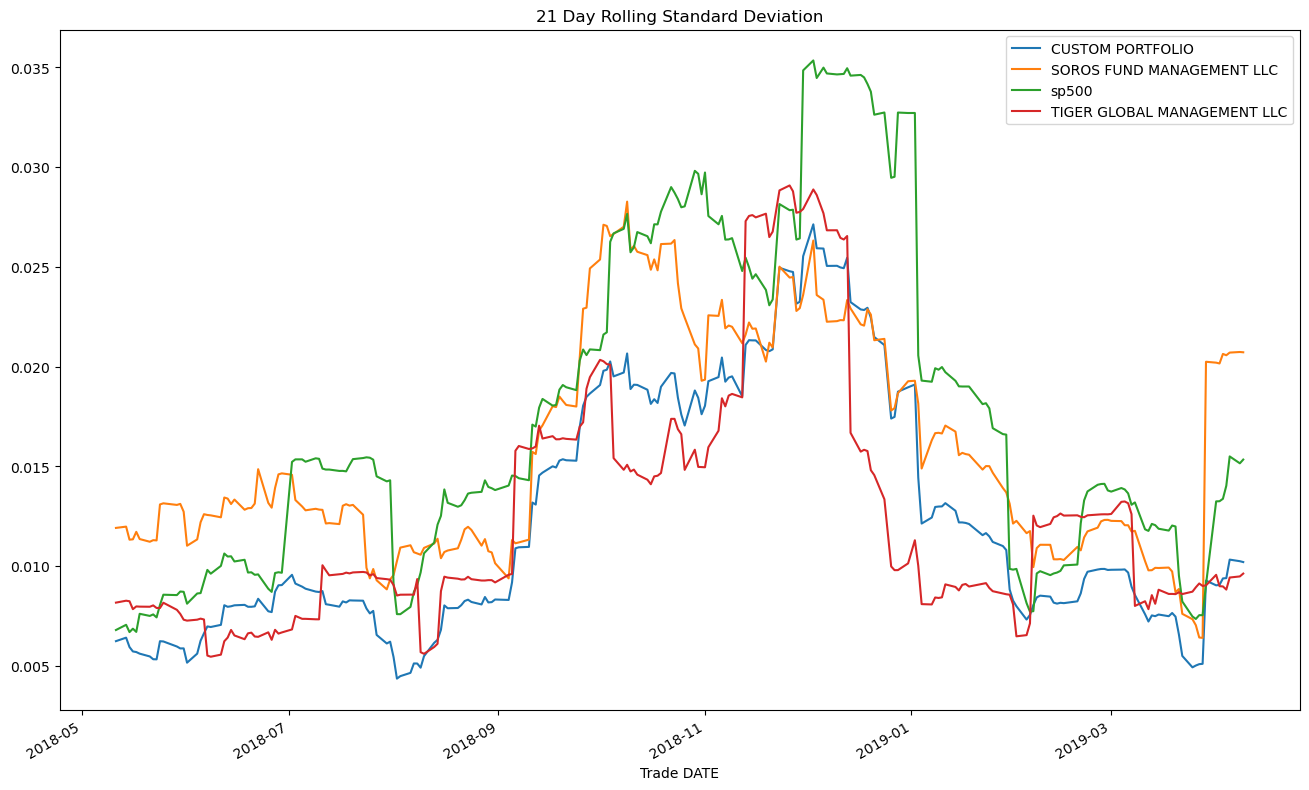

In [41]:
# Calculate rolling standard deviation

rolling21_std = df_integrated.rolling(window=21).std()

# Plot rolling standard deviation

rolling21_std.plot(figsize=(16,10), title='21 Day Rolling Standard Deviation')


### Calculate and plot the correlation

<Axes: >

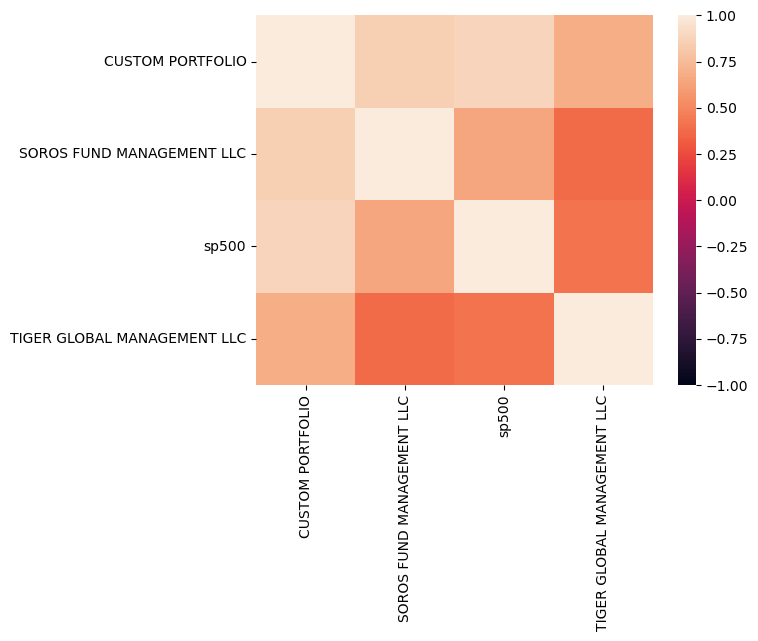

In [42]:
# Calculate and plot the correlation

all_correlation = df_integrated.corr()

sns.heatmap(all_correlation, vmin=-1, vmax=1)


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [43]:
print(df_integrated.columns)

Index(['CUSTOM PORTFOLIO', 'SOROS FUND MANAGEMENT LLC', 'sp500',
       'TIGER GLOBAL MANAGEMENT LLC'],
      dtype='object')


Index(['CUSTOM PORTFOLIO', 'SOROS FUND MANAGEMENT LLC', 'sp500',
       'TIGER GLOBAL MANAGEMENT LLC'],
      dtype='object')


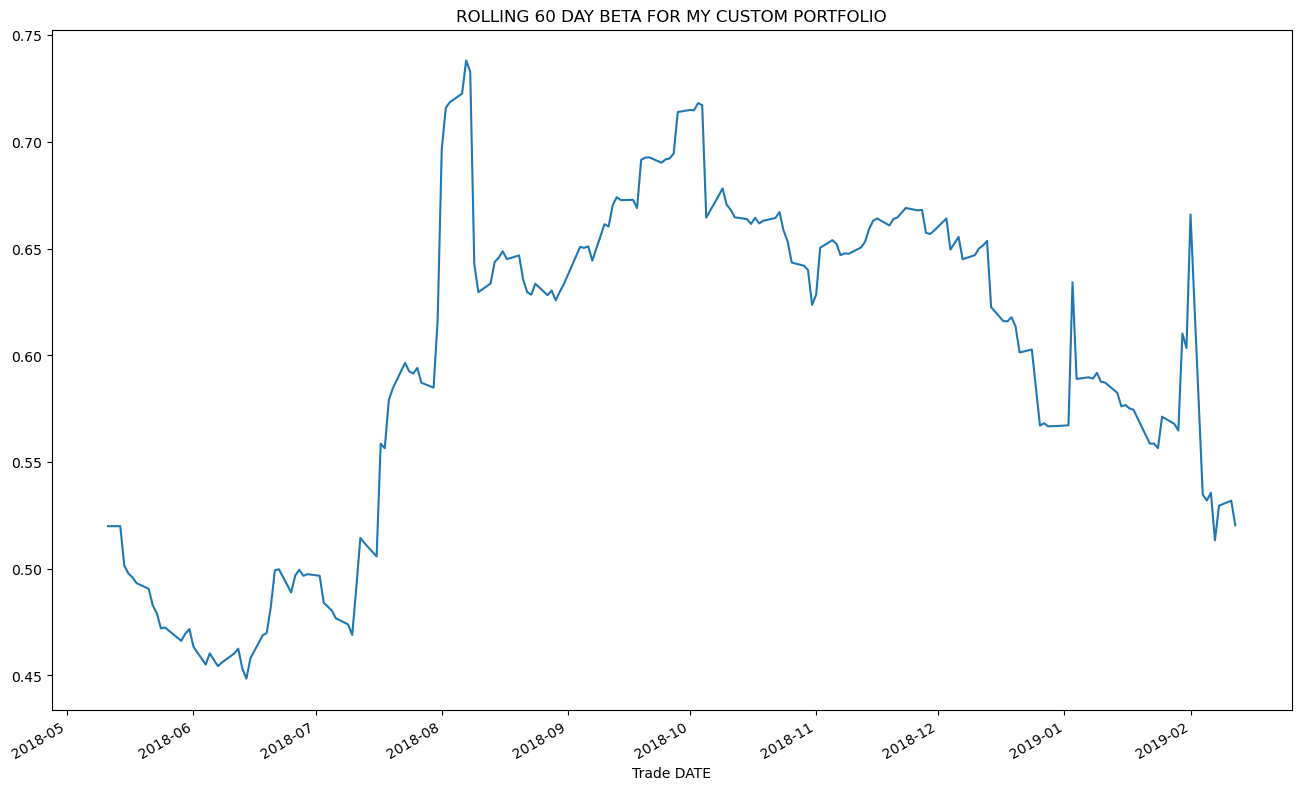

In [44]:
# Calculate and plot Beta

cov = df_integrated["CUSTOM PORTFOLIO"].cov(df_integrated["sp500"])

var = df_integrated["sp500"].var()

beta = cov / var

Rolling_cov = df_integrated["CUSTOM PORTFOLIO"].rolling(window=60).cov(df_integrated["sp500"])

Rolling_var = df_integrated["sp500"].rolling(window=60).var()

Rolling_beta = Rolling_cov / Rolling_var

Rolling_beta.plot(figsize=(16,10), title='ROLLING 60 DAY BETA FOR MY CUSTOM PORTFOLIO')

print(df_integrated.columns)


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [45]:
# Calculate Annualized Sharpe Ratios

custom_sr = (df_integrated.mean() * 252) / annual_std

custom_sr

CUSTOM PORTFOLIO              -0.376153
SOROS FUND MANAGEMENT LLC     -0.084987
sp500                         -0.061751
TIGER GLOBAL MANAGEMENT LLC   -0.929405
dtype: float64

<Axes: title={'center': 'Sharpe Ratios of Customized Portfolio'}>

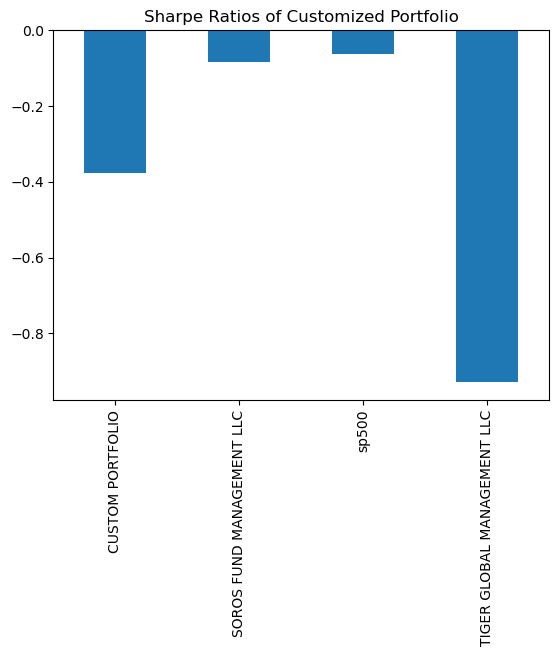

In [46]:
# Visualize the sharpe ratios as a bar plot

custom_sr.plot(kind="bar", title="Sharpe Ratios of Customized Portfolio")


### How does your portfolio do?

Write your answer here!

My custom portfolio exhibits a few main characteristics. The most concerning, however, was the negative Sharpe Ratio. This generally indicates that the portfolio will not make money (produce negative returns). It is this reason that points to my custom portfolio being the second worst portfolio option. The only choice that would be worse than adopting my portfolio would the to adopt the Tiger Global Management portfolio.